In [ ]:
import random as rd
import pandas as pd
import math

Variant = 13
rd.seed(Variant)
Str1 = 'qwertyuioplkjhgfdsazxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM'
N = rd.randint(20,40)
s1 = ''
for i in range(N):
    s1 += Str1[rd.randint(0, len(Str1)-1)]
D = '!@#$%&*+:;|'[rd.randint(0,10)]
N1 = rd.randint(3,30)
N2 = int(N1 * (N1 + 1) / 2)
if (int(N2/N1) - math.floor(N2/N1)) == 0:
    M = int(N2 / N1)
    K = int(N2 / M)
else:
    M = int(N2 / (N1 + 1))
    K = int(N2 / M)
N4 = rd.randint(123432, 5645634534)
Data  = pd.DataFrame({'Задание':[1,2,3,4,5],'Параметры':['S='+s1,[D, 'N='+str(N2),
                    'M ='+str(M), 'K = '+str(K)],'-','N='+str(N4),'-']})
Data


,Задание,Параметры
0,1,S=aKKMkHgJpgHXkotOhCawWoKDqspy
1,2,"[%, N=435, M =15, K = 29]"
2,3,-
3,4,N=4894269367
4,5,-


Задача №1:

Разработать программу на языке ассемблера, которая выводит на экран заданную строку S в обратном порядке.

In [ ]:
format ELF64

public _start
public exit
public print_symb

section '.bss' writable
  array db 0,0xA, "aKKMkHgJpgHXkotOhCawWoKDqspy"
  place db ?

section '.text' executable
  _start:
    mov rcx, 29
    .iter:
       mov al, [array+rcx]
       push rcx
       call print_symb
       pop rcx
       dec rcx
       cmp rcx, 0
       jne .iter
    call exit

print_symb:
  push rax
  mov eax, 4
  mov ebx, 1
  pop rdx
  mov [place], dl
  mov ecx, place
  mov edx, 1
  int 0x80
  ret

exit:
  mov eax, 1
  mov ebx, 0
  int 0x80

ypsqDKoWwaChOtokXHgpJgHkMKKa

Задача №2:

Разработать программу на языке ассемблера, в которой заполнить память заданными символами, вывести их в виде матрицы по N символов в строке и K строк

In [ ]:
format ELF64

public _start
public exit
public print_symb

section '.bss' writeable
  pointer db 15 dup ('%'), 0xA

section '.text' executable
  _start:
    mov rcx, 29
    .iter1:
      push rcx
      call print_symb
      pop rcx

      cmp rcx, 0
      loop .iter1
    jmp exit

print_symb:
  mov rax, 4
  mov rbx, 1
  mov rcx, pointer
  mov rdx, 16
  int 0x80
  ret

exit:
  mov eax, 1
  xor ebx, ebx
  int 0x80

# 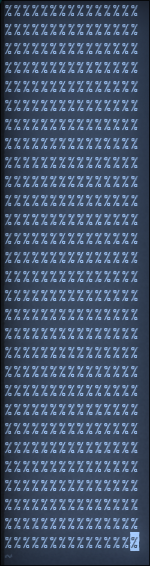

Задача №3:

В задании 2 вывести символы в виде треугольника. Например, для 21 символа "8":

8

88

888

8888

88888

888888

In [ ]:
format ELF64

public _start
public exit
public print_symb

section '.data' writeable
  string db '%'
  pointer db ?
  len dq 0


section '.text' executable
  _start:
    xor rcx, rcx

    .loop1:
      inc rcx
      push rcx

      xor rdx, rdx
      .loop2:

        push rdx
        mov al, '%'
        call print_symb
        pop rdx
        inc rdx

        pop rcx
        cmp rdx, rcx
        push rcx

        jne .loop2

      mov al, 0xA
      call print_symb

      pop rcx
      add [len], rcx
      cmp [len], 435
      jne .loop1

    jmp exit

print_symb:
  mov [pointer], al
  mov rcx, pointer
  mov rdx, 1
  mov rax, 4
  mov rbx, 1
  int 0x80
  ret

exit:
  mov eax, 1
  xor ebx, ebx
  int 0x80

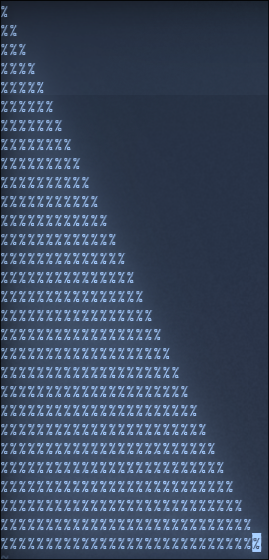

Задача №4:

Разработать программу на языке ассемблера, в которой для заданного числа N найти сумму его цифр и вывести результат на экран.

In [ ]:
format ELF64

public _start
public exit
public print_symb

section '.data' writeable
  number dq 4894269367
  pointer db ?
  len db 0

section '.text' executable
  _start:
    xor rcx, rcx

    mov rax, [number]
    call sum
    mov [number], rbx

    .iter1:
      xor rdx, rdx
      mov rcx, 10
      mov rax, [number]
      div rcx
      mov [number], rax
      mov al, dl
      add al, '0'
      inc [len]
      push rax
      cmp [number], 0
      jne .iter1

    .iter2:
      pop rax
      call print_symb
      dec [len]
      jne .iter2

    mov al, 0xA
    call print_symb

    jmp exit

print_symb:
  mov [pointer], al
  mov rcx, pointer
  mov rdx, 1
  mov rax, 4
  mov rbx, 1
  int 0x80
  ret


sum:
  mov rcx, 10
  .iter:
  xor rdx,rdx
  div rcx
  add rbx, rdx

  cmp rax, 0
  jne .iter
  ret

exit:
  mov eax, 1
  xor ebx, ebx
  int 0x80

58

Задача №5:

Разработать программу аналогичную заданию 4 на языке программирования C. Провести сравнение размеров исполняемых файлов. Постараться сократить размер исполняемого файла на языке ассемблера и на языке С.

Cокращенная версия для 4 задания:

In [ ]:
format ELF64
public _start
number dq 4894269367
pointer db ?
len db 0
_start:
xor rcx, rcx
mov rax, [number]
call sum
mov [number], rbx
.iter1:
  xor rdx, rdx
  mov rcx, 10
  mov rax, [number]
  div rcx
  mov [number], rax
  mov al, dl
  add al, '0'
  inc [len]
  push rax
  cmp [number], 0
  jne .iter1
.iter2:
  pop rax
  call print_symb
  dec [len]
  jne .iter2
mov al, 0xA
call print_symb
mov eax, 1
xor ebx, ebx
int 0x80
print_symb:
  mov [pointer], al
  mov rcx, pointer
  mov rdx, 1
  mov rax, 4
  mov rbx, 1
  int 0x80
  ret
sum:
  mov rcx, 10
  .iter:
  xor rdx,rdx
  div rcx
  add rbx, rdx
  cmp rax, 0
  jne .iter
  ret


58

Аналогичная программа, использующая С:

In [ ]:
#include <stdio.h>
int main() {long N = 4894269367; int rest = 0; while (N) {rest += N%10; N/=10;} printf("%d\n",rest); return 0;}

58